In [49]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
def fetch_data(tickers, start):
  data = yf.download(tickers, start)['Adj Close']
  returns = data.pct_change().dropna()
  return data, returns

In [51]:
d_, r_ = fetch_data(['AAPL','TSLA'],'2022-01-01')

[*********************100%***********************]  2 of 2 completed


In [52]:
def get_most_volatile_stocks(returns, top_n=20):
  volatility = returns.std() * np.sqrt(252)
  most_volatile = volatility.sort_values(ascending=False).head(top_n)
  return most_volatile

In [53]:
get_most_volatile_stocks(r_)

,0
Ticker,
TSLA,0.613038
AAPL,0.270935


In [54]:
np.ones(4) / 4

array([0.25, 0.25, 0.25, 0.25])

In [55]:
def simulate_portfolio(data, most_volatile):
  selected_stocks = data[most_volatile.index]
  equal_weights = np.ones(len(selected_stocks.columns)) / len(selected_stocks.columns)
  portfolio_returns = selected_stocks.pct_change().dropna().dot(equal_weights)
  cumulative_returns = (1+portfolio_returns).cumprod()
  return cumulative_returns, portfolio_returns

In [56]:
def fetch_benchmark(ticker, start):
  benchmark = yf.download(ticker, start)['Adj Close']
  benchmark_returns = benchmark.pct_change().dropna()
  cumulative_benchmark = (1+benchmark_returns).cumprod()
  return cumulative_benchmark, benchmark_returns

In [57]:
def plot_performance(cumulative_returns, cumulative_benchmark):
  plt.figure(figsize=(12,6))
  plt.plot(cumulative_returns, label='Portfolio')
  plt.plot(cumulative_benchmark, label='Benchmark')
  plt.title('Portfolio vs Benchmark Performance')
  plt.legend()
  plt.show()

In [58]:
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA", "META", "NVDA", "NFLX", "ADBE", "INTC",
           "PYPL", "CRM", "ORCL", "CSCO", "IBM", "QCOM", "AMD", "TXN", "AVGO", "LRCX", "SPGI",
           "MSCI", "BKNG", "ISRG", "NOW", "ADI", "FISV", "AMAT", "KLAC", "MU"]
benchmark_ticker = "SPY"
start_date = "2015-01-01"
data, returns = fetch_data(tickers, start_date)

[*********************100%***********************]  30 of 30 completed


[*********************100%***********************]  1 of 1 completed


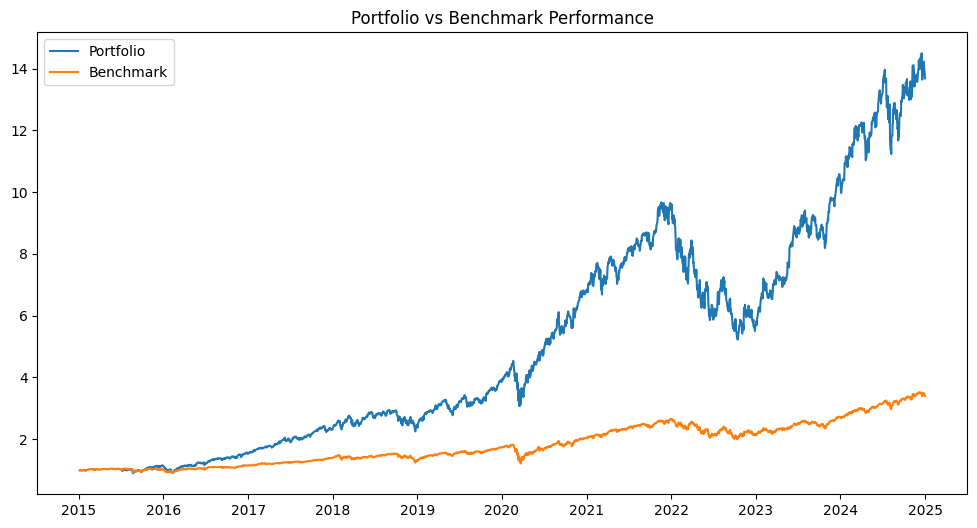

In [59]:
most_volatile = get_most_volatile_stocks(returns)
cumulative_returns, portfolio_returns = simulate_portfolio(data, most_volatile)
cumulative_benchmark, benchmark_returns = fetch_benchmark(benchmark_ticker, start_date)
plot_performance(cumulative_returns, cumulative_benchmark)